In [17]:
import pandas as pd
import matplotlib.pyplot as plt  #import matplotlib as plt
import folium
import json
from folium import plugins
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
air19 = pd.read_csv("air2019.csv")
air20 = pd.read_csv("air2020.csv")
air19 = pd.DataFrame(air19)
air20 = pd.DataFrame(air20)

In [3]:
pd.to_datetime(air19['Date'])
pd.to_datetime(air20['Date'])

0      2020-01-04
1      2020-01-10
2      2020-01-16
3      2020-01-22
4      2020-01-28
5      2020-02-03
6      2020-02-09
7      2020-02-15
8      2020-02-21
9      2020-02-27
10     2020-03-04
11     2020-03-10
12     2020-03-16
13     2020-03-22
14     2020-03-28
15     2020-04-03
16     2020-04-15
17     2020-04-21
18     2020-04-27
19     2020-05-03
20     2020-05-15
21     2020-05-27
22     2020-06-02
23     2020-06-08
24     2020-06-16
25     2020-06-20
26     2020-06-26
27     2020-07-02
28     2020-07-14
29     2020-07-20
          ...    
3069   2020-11-30
3070   2020-12-01
3071   2020-12-02
3072   2020-12-03
3073   2020-12-04
3074   2020-12-05
3075   2020-12-06
3076   2020-12-07
3077   2020-12-08
3078   2020-12-09
3079   2020-12-10
3080   2020-12-11
3081   2020-12-12
3082   2020-12-13
3083   2020-12-14
3084   2020-12-15
3085   2020-12-16
3086   2020-12-17
3087   2020-12-18
3088   2020-12-19
3089   2020-12-20
3090   2020-12-21
3091   2020-12-22
3092   2020-12-23
3093   202

In [4]:
air19.rename(columns={"Daily Mean PM2.5 Concentration": "PM2.5 2019"}, inplace=True)
air20.rename(columns={"Daily Mean PM2.5 Concentration": "PM2.5 2020"}, inplace=True)

In [5]:
meanPM2_5_2019 = pd.DataFrame(air19.groupby(["Date"])["PM2.5 2019"].mean())
meanPM2_5_2020 = pd.DataFrame(air20.groupby(["Date"])["PM2.5 2020"].mean())
meanPM2_5_2019.reset_index(inplace=True)
meanPM2_5_2020.reset_index(inplace=True)

In [6]:
dfs = [meanPM2_5_2019, meanPM2_5_2020]
#combine columns
#pm25 = pd.concat(dfs, ignore_index=True, keys=['2019', '2020'])
#combine rows
pm25 = pd.concat(dfs, axis=1)

In [7]:
pm25.columns = ["date19", "PM2.5 2019", "date20", "PM2.5 2020"]

In [ ]:
#%matplotlib
#meanPM2_5_2019.plot.line(x="Date",y="2019 PM2.5", title="2019")
#meanPM2_5_2020.plot.line(x="Date",y="2020 PM2.5", title="2020")

Text(0,0.5,'Daily Mean PM2.5 Concentration')

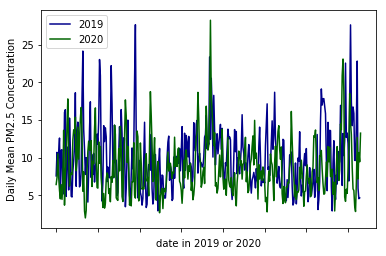

In [11]:
ax = pm25.plot(kind='line', x='date19', y='PM2.5 2019',color='DarkBlue', label='2019')
pm25.plot(kind='line', x='date20', y='PM2.5 2020',color='DarkGreen', label='2020', ax=ax)
ax.set_xlabel("date in 2019 or 2020")
ax.set_ylabel("Daily Mean PM2.5 Concentration")

In [8]:
pm25['diff'] = pm25['PM2.5 2020'] - pm25['PM2.5 2019'] 

,Date,Source,Site ID,POC,PM2.5 2020,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/04/2020,AQS,170310001,1,8.4,ug/m3 LC,35,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457
1,01/10/2020,AQS,170310001,1,12.0,ug/m3 LC,50,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457
2,01/16/2020,AQS,170310001,1,10.7,ug/m3 LC,45,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457
3,01/22/2020,AQS,170310001,1,14.5,ug/m3 LC,56,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457
4,01/28/2020,AQS,170310001,1,14.5,ug/m3 LC,56,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457


Text(0,0.5,'Difference in PM2.5 Concentration 2020-2019')

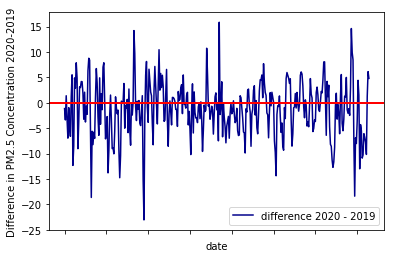

In [22]:
ax = pm25.plot(kind='line', x='date19', y='diff',color='DarkBlue', label = 'difference 2020 - 2019')
ax.axhline(linewidth=2, color='r')
ax.set_xlabel("date")
ax.set_ylabel("Difference in PM2.5 Concentration 2020-2019")

In [19]:
#moving average 
#https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def moving_av(data_list):
    N = 2
    cumsum, moving_aves = [0], []

    for i, x in enumerate(data_list, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            moving_aves.append(moving_ave)
    return moving_aves

In [26]:
move_av_2019 = moving_av(pm25['PM2.5 2019'])
move_av_2020 = moving_av(pm25['PM2.5 2020'])
move_av_2019 = pd.DataFrame(move_av_2019)
move_av_2020 = pd.DataFrame(move_av_2020)
pm25 = pd.concat([pm25,move_av_2019], ignore_index=True, axis=1)
pm25 = pd.concat([pm25,move_av_2020], ignore_index=True, axis=1)
pm25.columns = ["date19", "PM2.5 2019", "date20", "PM2.5 2020", "move_av_2019", "move_av_2020"]

ValueError: Length mismatch: Expected axis has 7 elements, new values have 6 elements

In [11]:
air19['yearmon'] = pd.DatetimeIndex(air19['Date']).to_period('M')
air20['yearmon'] = pd.DatetimeIndex(air20['Date']).to_period('M')

In [16]:
meanPM2_5_2019_month = pd.DataFrame(air19.groupby(["yearmon"])["PM2.5 2019"].mean())
meanPM2_5_2020_month = pd.DataFrame(air20.groupby(["yearmon"])["PM2.5 2020"].mean())
meanPM2_5_2019_month.reset_index(inplace=True)
meanPM2_5_2020_month.reset_index(inplace=True)

In [17]:
meanPM2_5_2019_month.head()

,yearmon,PM2.5 2019
0,2019-01,9.844488
1,2019-02,11.549782
2,2019-03,9.915358
3,2019-04,8.515358
4,2019-05,7.841667


Text(0,0.5,'Monthly Mean PM2.5 Concentration')

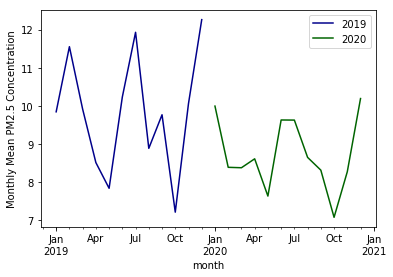

In [20]:
ax = meanPM2_5_2019_month.plot(kind='line', x='yearmon', y='PM2.5 2019',color='DarkBlue', label='2019')
meanPM2_5_2020_month.plot(kind='line', x='yearmon', y='PM2.5 2020',color='DarkGreen', label='2020', ax=ax)
ax.set_xlabel("month")
ax.set_ylabel("Monthly Mean PM2.5 Concentration")

In [38]:
with open('chicago.geojson') as f:
    chicago = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'chicago.geojson'

In [29]:
chicago_map = folium.Map([41.8781, -87.6298], zoom_start=11)

In [31]:
chicago_map.choropleth(geo_path='chicago.geojson')

/anaconda3/lib/python3.6/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


TypeError: __init__() missing 1 required positional argument: 'geo_data'

In [49]:
#gdf = geopandas.read_file(chicago)
folium.GeoJson(chicago.geojson).add_to(chicago_map)

SyntaxError: invalid syntax (<ipython-input-49-500b28c19a87>, line 2)

In [54]:
gdf = geopandas.read_file('chicago.geojson')

DriverError: chicago.geojson: No such file or directory

In [8]:
site_mean_2019 = pd.DataFrame(air19.groupby(["Site ID"])["PM2.5 2019","SITE_LONGITUDE","SITE_LATITUDE"].mean())
site_mean_2020 = pd.DataFrame(air20.groupby(["Site ID"])["PM2.5 2020","SITE_LONGITUDE","SITE_LATITUDE"].mean())
site_mean_2019.reset_index(inplace=True)
site_mean_2020.reset_index(inplace=True)

In [9]:
site_mean_2019.head()

,Site ID,PM2.5 2019,SITE_LONGITUDE,SITE_LATITUDE
0,170310001,10.268820,-87.732457,41.670992
1,170310022,9.310274,-87.539315,41.687165
2,170310052,9.162500,-87.749928,41.965485
3,170310057,9.134456,-87.722673,41.912739
4,170310076,9.872388,-87.713488,41.751400


In [10]:
air19.head()

,Date,Source,Site ID,POC,PM2.5 2019,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/03/2019,AQS,170310001,1,7.8,ug/m3 LC,33,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457
1,01/09/2019,AQS,170310001,1,3.8,ug/m3 LC,16,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457
2,01/15/2019,AQS,170310001,1,8.9,ug/m3 LC,37,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457
3,02/09/2019,AQS,170310001,1,8.8,ug/m3 LC,37,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457
4,03/16/2019,AQS,170310001,1,3.6,ug/m3 LC,15,VILLAGE GARAGE,1,100.0,88101,PM2.5 - Local Conditions,16980,"Chicago-Naperville-Elgin, IL-IN-WI",17,Illinois,31,Cook,41.670992,-87.732457


In [28]:
crs = {'init': 'epsg:3435'}

In [19]:
#https://www.lib.uchicago.edu/e/collections/maps/uofcgis.html
chicago_map = gpd.read_file('/Users/ellienewman/Desktop/ERG/data_20_21/ellie_newman/chicomm/chicomm.shp')

/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


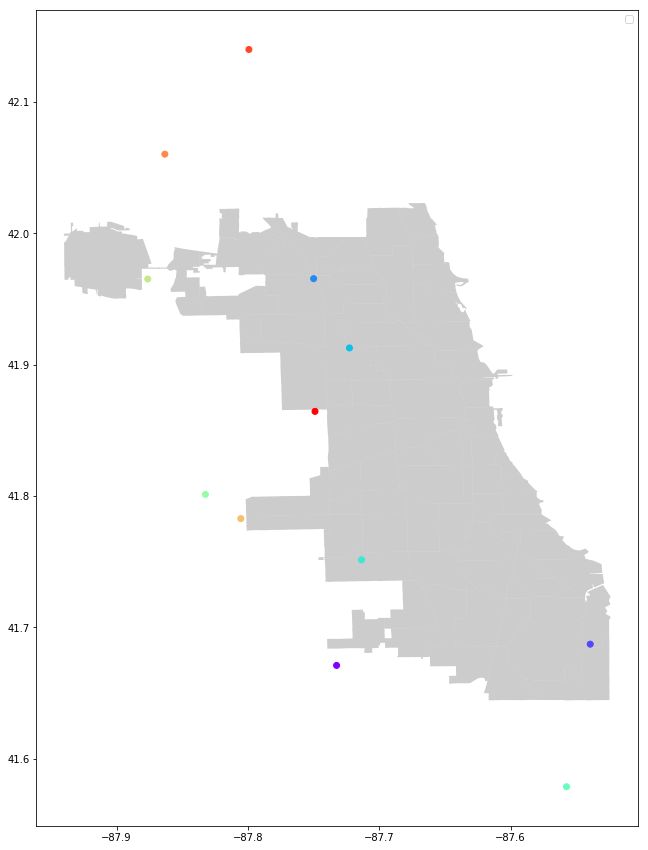

In [43]:
#https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
geometry = [Point(xy) for xy in zip(site_mean_2019["SITE_LONGITUDE"],site_mean_2019["SITE_LATITUDE"])] 
geodf = gpd.GeoDataFrame(site_mean_2019, crs=crs, geometry=geometry)
fig,ax = plt.subplots(figsize=(15,15))
chicago_map.plot(ax = ax, alpha = 0.4, color="grey")
geodf.plot(ax=ax, marker = 'o', cmap='rainbow')

,Site ID,PM2.5 2019,SITE_LONGITUDE,SITE_LATITUDE,geometry
0,170310001,10.268820,-87.732457,41.670992,POINT (-87.73245689628402 41.67099189528331)
1,170310022,9.310274,-87.539315,41.687165,POINT (-87.53931548414778 41.68716543763434)
2,170310052,9.162500,-87.749928,41.965485,POINT (-87.74992805532021 41.96548483017667)
3,170310057,9.134456,-87.722673,41.912739,POINT (-87.72267300000009 41.91273899999979)
4,170310076,9.872388,-87.713488,41.751400,POINT (-87.71348815200054 41.75139997863747)


,Site ID,PM2.5 2019,SITE_LONGITUDE,SITE_LATITUDE,geometry
0,170310001,10.268820,-87.732457,41.670992,POINT (-87.73245689628402 41.67099189528331)
1,170310022,9.310274,-87.539315,41.687165,POINT (-87.53931548414778 41.68716543763434)
2,170310052,9.162500,-87.749928,41.965485,POINT (-87.74992805532021 41.96548483017667)
3,170310057,9.134456,-87.722673,41.912739,POINT (-87.72267300000009 41.91273899999979)
4,170310076,9.872388,-87.713488,41.751400,POINT (-87.71348815200054 41.75139997863747)
5,170310119,10.541776,-87.557406,41.578620,POINT (-87.55740607463778 41.5786196210496)
6,170311016,9.797590,-87.832349,41.801180,POINT (-87.83234900000015 41.80118000000014)
7,170313103,10.841228,-87.876265,41.965193,POINT (-87.87626473349715 41.96519348142375)
8,170313301,9.337607,-87.805377,41.782766,POINT (-87.80537679466759 41.78276600792507)
9,170314007,10.345455,-87.863225,42.060285,POINT (-87.86322543438291 42.06028469105397)
